In [123]:
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

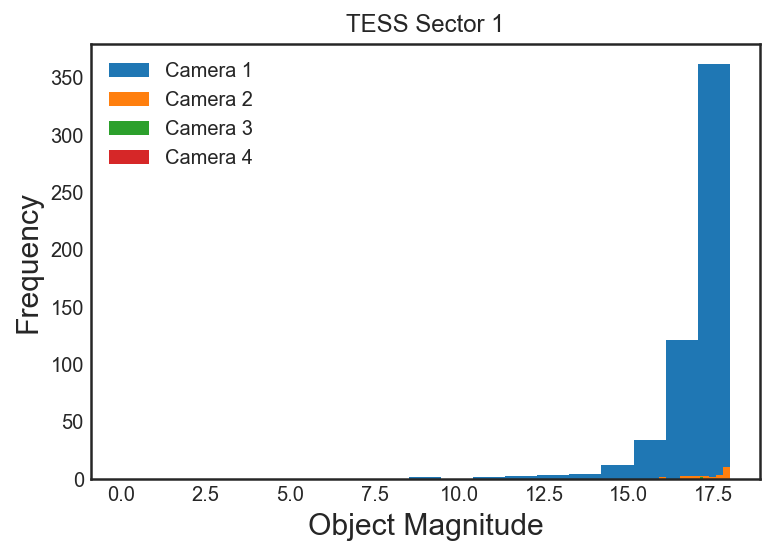

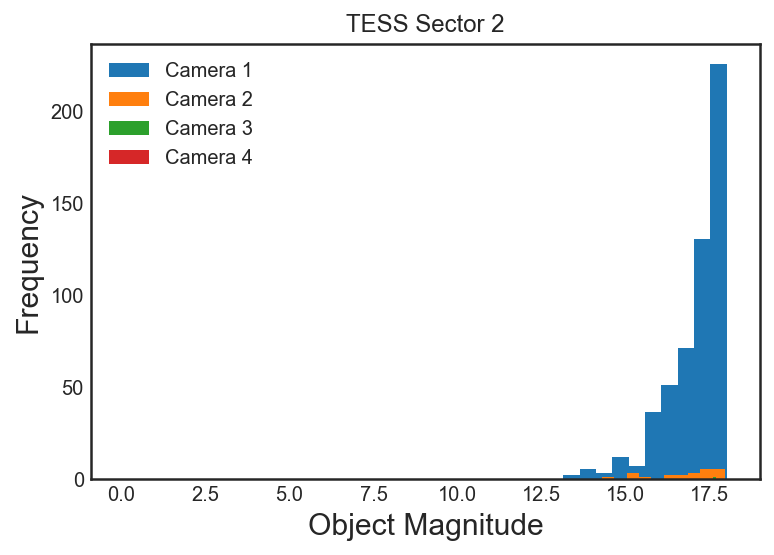

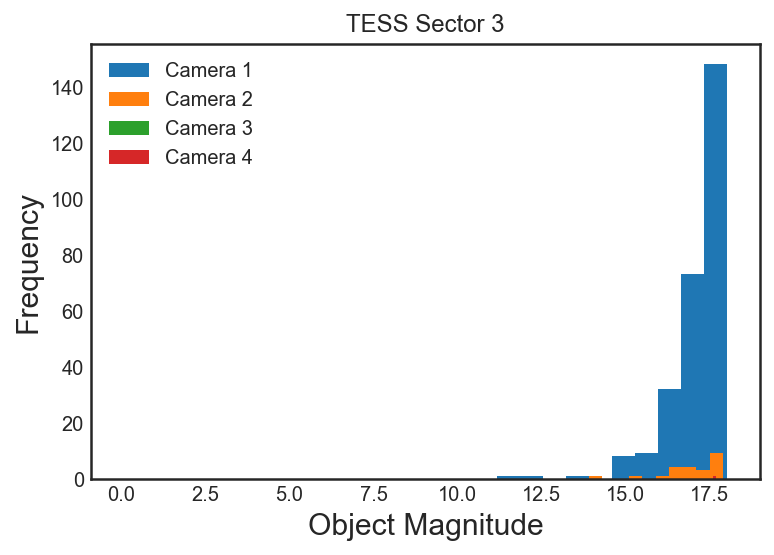

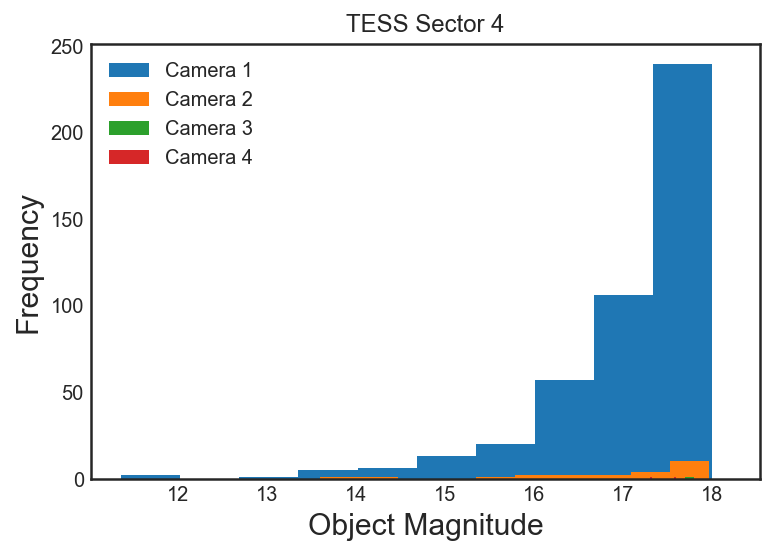

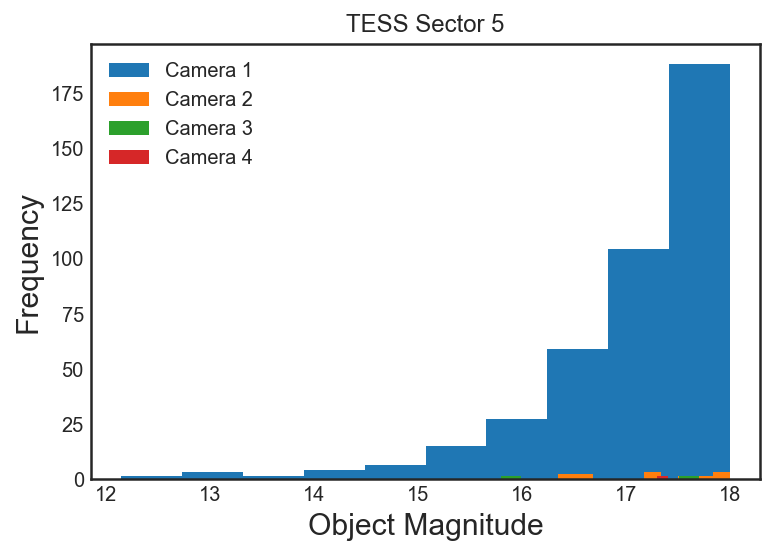

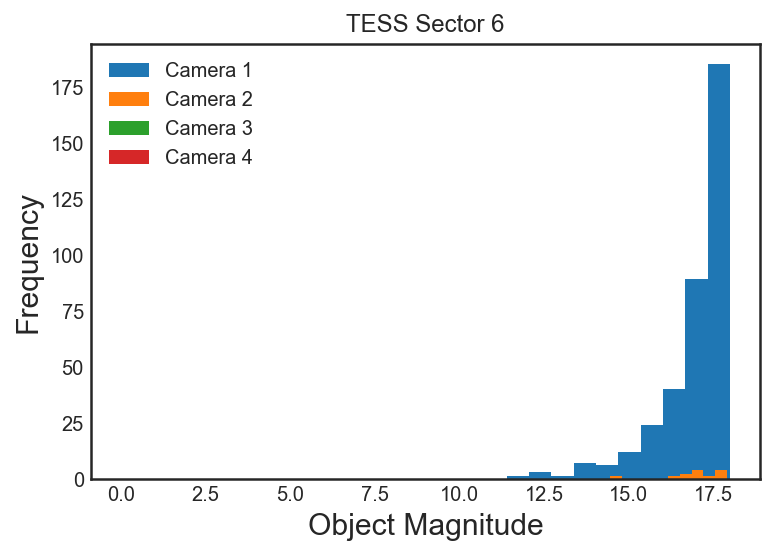

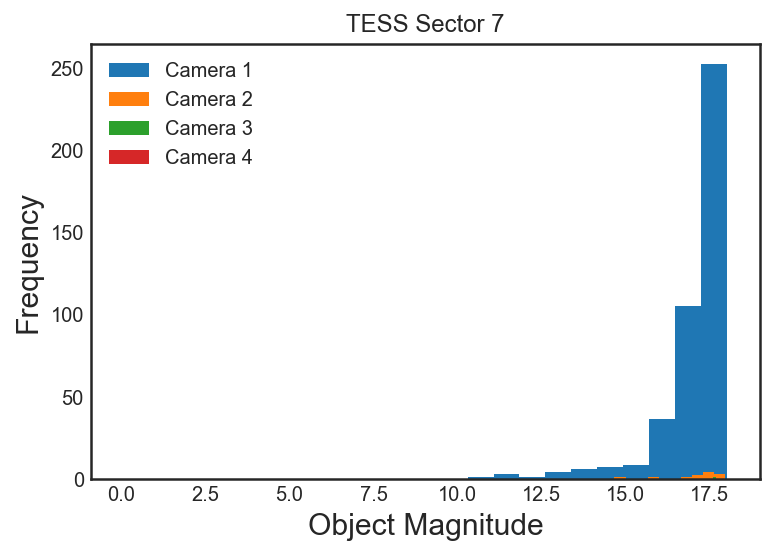

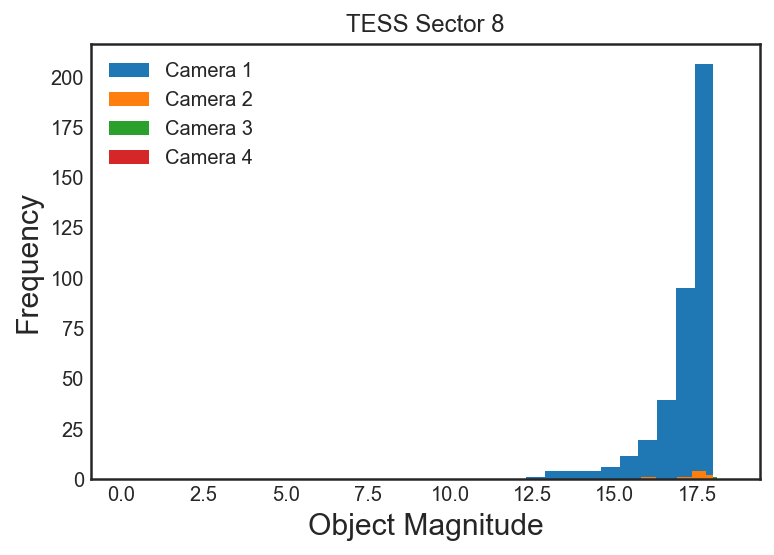

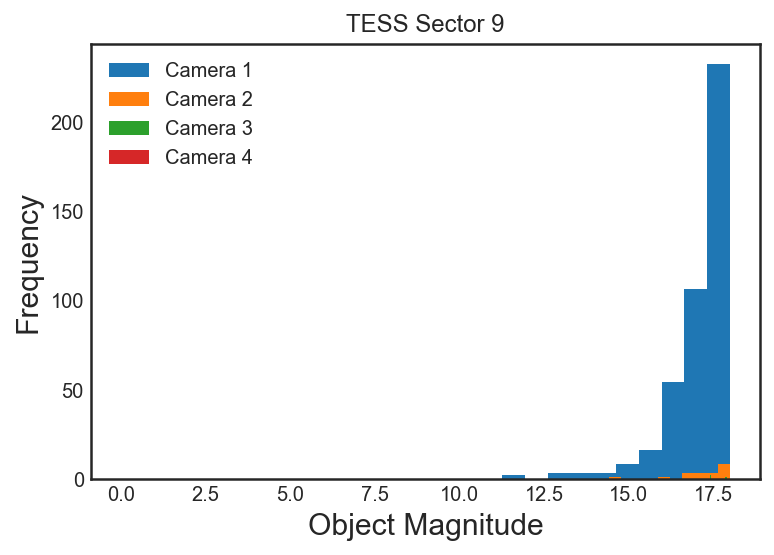

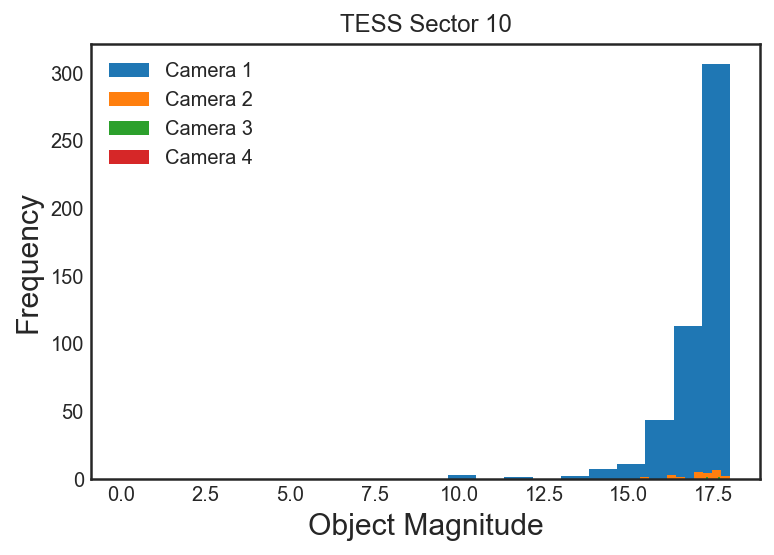

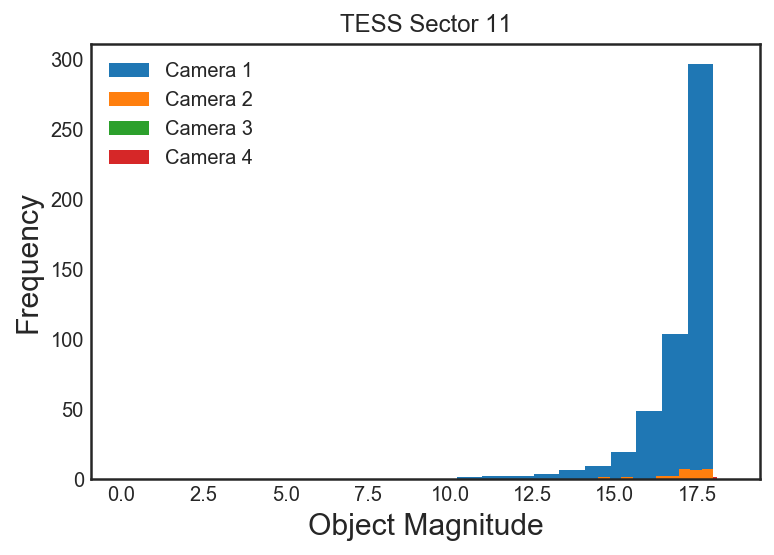

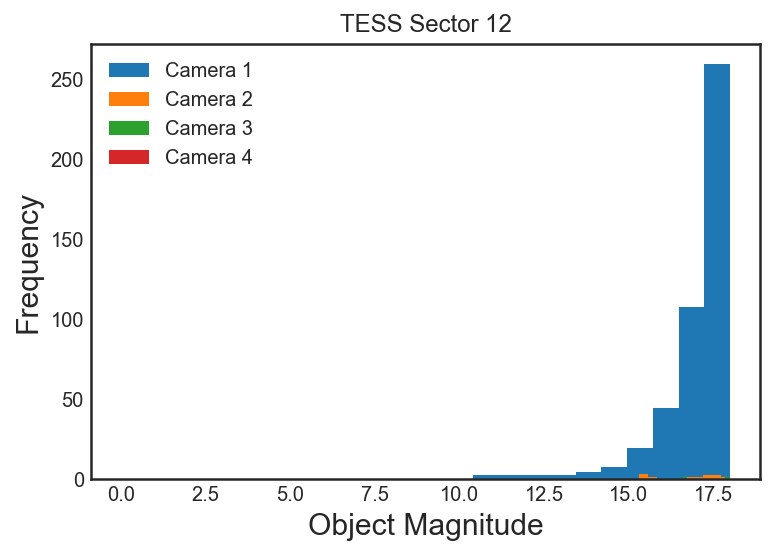

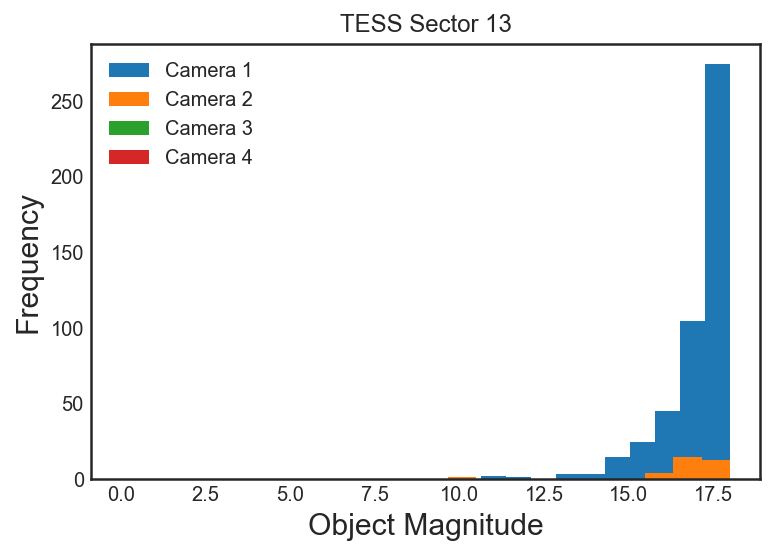

In [124]:
all_piv = None
for sector in np.arange(0, 13):
    fig, ax = plt.subplots(1)
    for camera in np.arange(1, 5):
        piv = pd.read_hdf('catalog/sector{}-camera{}.hf5'.format(sector, camera))
        objects = piv.index.get_level_values(0).unique()
        mags = np.asarray([piv.Mv[piv.index.get_level_values(0) == obj].mean() for obj in objects])
        piv = piv[[n in objects[mags <= 18] for n in piv.index.get_level_values(0)]]

        c = SkyCoord(np.asarray(piv.index.get_level_values(1)), np.asarray(piv.index.get_level_values(2)), unit=(u.deg, u.deg))

        objects = piv.index.get_level_values(0).unique()
        mags = np.asarray([piv.Mv[piv.index.get_level_values(0) == obj].mean() for obj in objects])


        #plt.figure(figsize=(10, 10))
        #for obj, mag in zip(objects, mags):
        #    c1 = c[piv.index.get_level_values(0) == obj]
        #    plt.plot(c1.ra.value, c1.dec.value, c='k', lw= (19 - mag)/2, alpha=0.5)
        #plt.xlabel('RA [deg]', fontsize=20)
        #plt.ylabel('Declination [deg]', fontsize=20)
        #plt.title('TESS Sector 1 Camera {}'.format(camera), fontsize=25)

        ax.hist(mags, label='Camera {}'.format(camera));
        ax.set_ylabel("Frequency", fontsize=15)
        ax.set_xlabel('Object Magnitude', fontsize=15)
        ax.legend()
        if all_piv is None:
            all_piv = piv
        else:
            all_piv = all_piv.append(piv)
    ax.set_title('TESS Sector {}'.format(sector + 1))

In [125]:
objects = all_piv.index.get_level_values(0).unique()
mags = np.asarray([all_piv.Mv[all_piv.index.get_level_values(0) == obj].mean() for obj in objects])
c = SkyCoord(np.asarray(all_piv.index.get_level_values(1)), np.asarray(all_piv.index.get_level_values(2)), unit=(u.hourangle, u.deg))

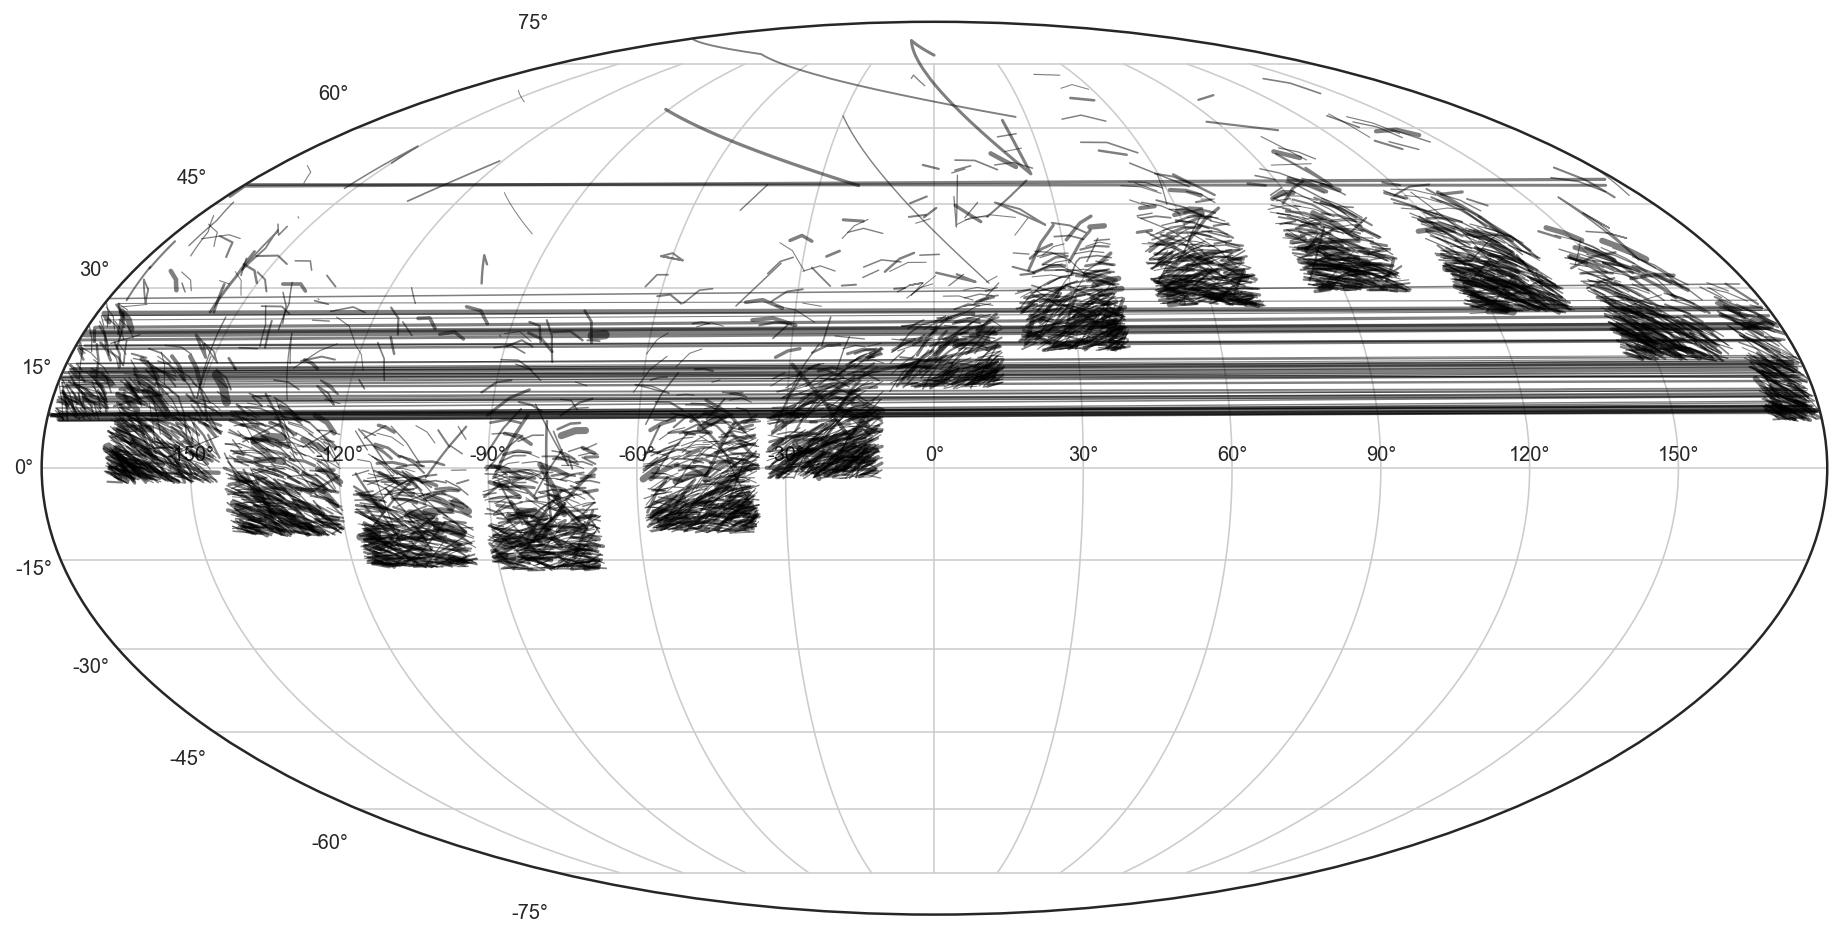

In [126]:
fig = plt.figure(figsize=(8*2, 4.2*2))
ax = plt.subplot(111, projection="mollweide")
ax.grid(True)
for obj, mag in zip(objects, mags):
    c1 = c[all_piv.index.get_level_values(0) == obj]
    ax.plot(Angle(c1.ra.wrap_at(180*u.deg)).radian, Angle(c1.dec).radian, c='k', lw= (19 - mag)/2, alpha=0.5)

In [127]:
all_piv.to_pickle('all_piv.p')